In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop(labels='User ID', axis=1, inplace=True)

In [6]:
dum=pd.get_dummies(df.Gender, drop_first=True)

In [7]:
df=pd.concat([df.drop(labels="Gender",axis=1), dum], axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [10]:
X=df.loc[:,['Male', 'Age', 'EstimatedSalary']]
y=df.loc[:,'Purchased']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn=KNeighborsClassifier()

In [14]:
param={'n_neighbors': list(range(5,100,1))}

In [15]:
skl=StandardScaler()

from sklearn.decomposition import PCA

pca=PCA()

pipe=Pipeline([('scale',skl),('dim_red',pca)])

In [16]:
X_train_skl=skl.fit_transform(X_train)
X_test_skl=skl.transform(X_test)

In [17]:
knn_gcv=GridSearchCV(estimator=knn, param_grid=param, n_jobs=5, return_train_score=True, cv=10,
                    verbose=1, scoring='accuracy')

In [18]:
knn_gcv.fit(X_train_skl, y_train)

Fitting 10 folds for each of 95 candidates, totalling 950 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 950 out of 950 | elapsed:    4.5s finished
C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=5,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [19]:
knn_gcv.best_score_

0.9107142857142857

In [20]:
from sklearn.metrics import classification_report, roc_auc_score

In [21]:
print(classification_report(y_test, knn_gcv.predict(X_test_skl)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        73
           1       0.90      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



In [22]:
print("AUC {:.2f}".format(roc_auc_score(y_test, knn_gcv.predict_proba(X_test_skl)[:,1])))

AUC 0.97


In [23]:
knn_gcv.best_params_

{'n_neighbors': 7}

In [24]:
knn_gcv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [25]:
Score=pd.DataFrame(knn_gcv.cv_results_.get('mean_train_score'), columns=["Score"])

In [26]:
K=pd.DataFrame(knn_gcv.cv_results_.get('param_n_neighbors'), columns=['N_Neigbours'])

In [27]:
scree=pd.concat([Score, K], axis=1)

([<matplotlib.axis.XTick at 0x1de24a539c8>,
 <a list of 10 Text xticklabel objects>)

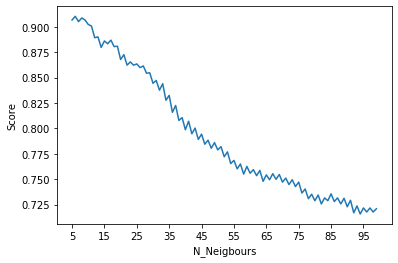

In [28]:
sns.lineplot(x=scree.N_Neigbours, y=scree.Score, data=scree)
plt.xticks(range(5,101,10))

In [29]:
knn=KNeighborsClassifier(n_neighbors=7)

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
from sklearn.decomposition import PCA

pca=PCA()

pipe=Pipeline([('scale',skl),('dim_red',pca), ('classif',knn)])

In [33]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classif',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

In [34]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        73
           1       0.90      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



In [35]:
print("AUC {: .2f}".format(roc_auc_score(y_test,pipe.predict(X_test))))

AUC  0.92


In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
sm=SMOTE(ratio=1)

In [38]:
X_train_smt, y_train_smt= sm.fit_sample(X_train, y_train)

In [42]:
pipe.fit(X_train_smt, y_train_smt)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classif',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

In [44]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        73
           1       0.88      0.94      0.91        47

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



In [45]:
print(roc_auc_score(y_test, pipe.predict(X_test)))

0.9269892159720198
